In [2]:
from ig_pkg.models.pretrained_models import get_pretrained_model
from ig_pkg.inputattribs.ig import ig
from ig_pkg.inputattribs.baseline_generator import get_baseline_generator
from ig_pkg.datasets import get_datasets
from ig_pkg.inputattribs.utils import process_heatmap
import torchvision.transforms as T 

data_path="/root/data/ILSVRC2012_val/"

_, valid_datasets = get_datasets("imagenet1k", data_path)
_, valid_datasets2 = get_datasets("imagenet1k", data_path, transform=T.Compose([T.Resize(256),T.CenterCrop(256),]) )

device="cuda:0"
model = get_pretrained_model("vgg16").to(device)

ModuleNotFoundError: No module named 'scipy'

In [3]:
from ig_pkg.models.pretrained_models import get_pretrained_model
from ig_pkg.inputattribs.ig import ig
from ig_pkg.inputattribs.baseline_generator import get_baseline_generator
from ig_pkg.datasets import get_datasets
from ig_pkg.inputattribs.utils import process_heatmap
import torchvision.transforms as T 

In [2]:
import torch
from ig_pkg.models.generator import get_model
from ig_pkg.models.classifier import get_classifier
import torchvision.transforms as T

IMAGENET_MEAN = [0.485, 0.456, 0.406]
IMAGENET_STD  = [0.229, 0.224, 0.225]

gen = get_model('stylegan', '/root/pretrained/stylegan-celebahq-1024x1024.pt', 1024)
gen = gen.to('cuda:0')

latent = torch.rand((5, 512)).to("cuda:0")
images = gen(latent)
print(images.size())

import torch.nn.functional as F
img = F.interpolate(images, 224)
print(img.size())
classifier = get_classifier('resnet', 'data')
classifier = classifier.to("cuda:0")

score = classifier(images)
print(torch.argmax(score, dim = 1))

score = classifier(img)
print(torch.argmax(score, dim = 1))


torch.Size([5, 3, 1024, 1024])
torch.Size([5, 3, 224, 224])


/root/dh/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/root/dh/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


tensor([225,  14, 225, 225, 225], device='cuda:0')
tensor([225,  49, 172, 201, 270], device='cuda:0')


In [19]:
for i in range(5):
    sc = score[i]
    while(1):        
        a = torch.argmax(sc).item() 
        if str(a) in class_names:
            break
        sc[a] = 0        
    print(a)

44
49
47
188
270


array([225,  49, 172, 201, 270])

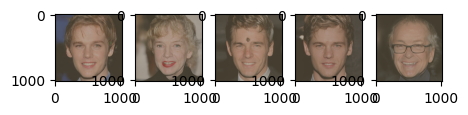

<Figure size 640x480 with 0 Axes>

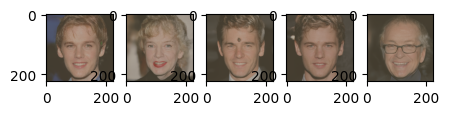

<Figure size 640x480 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
from ig_pkg.misc import convert_to_img
fig, axes = plt.subplots(1, 5, figsize = (5, 5))
axes = axes.flat

plt.figure()
for i in range(5):
    ax = next(axes)
    x = images[i]    
    imga = convert_to_img(x)
    ax.imshow(imga)

fig, axes = plt.subplots(1, 5, figsize = (5, 5))
axes = axes.flat

plt.figure()
for i in range(5):
    ax = next(axes)
    x = img[i]    
    imgb = convert_to_img(x)
    ax.imshow(imgb)

/root/data/CelebA_HQ_facial_identity_dataset/train/44/5408.jpg
/root/data/CelebA_HQ_facial_identity_dataset/train/49/2241.jpg
/root/data/CelebA_HQ_facial_identity_dataset/train/47/17054.jpg
/root/data/CelebA_HQ_facial_identity_dataset/train/188/1258.jpg
/root/data/CelebA_HQ_facial_identity_dataset/train/270/13150.jpg


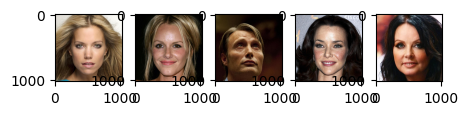

<Figure size 640x480 with 0 Axes>

In [21]:
# from ig_pkg.datasets import get_datasets
# train_dataset, valid_dataset = get_datasets(name= 'celebAHQ_identity', data_path = '/root/data/CelebA_HQ_facial_identity_dataset')
# class_names = train_dataset.classes
# ans = torch.argmax(score, dim = 1)
# ans = ans.cpu().detach().clone().numpy()
image_path = '/root/data/CelebA_HQ_facial_identity_dataset/train'

fig, axes = plt.subplots(1, 5, figsize = (5, 5))
axes = axes.flat

plt.figure()
import os
from PIL import Image
temp_list = [44, 49, 47, 188, 270]

for i in range(5):
    img_directory = os.path.join(image_path, str(temp_list[i]))    
    img_path_list = os.listdir(img_directory)
    img_path = os.path.join(img_directory, img_path_list[0])
    print(img_path)
    im = Image.open(img_path)
    
    ax = next(axes)
#     x = img[i]    
#     imgb = convert_to_img(x)
    ax.imshow(im)

In [13]:
class_names

['102',
 '1027',
 '103',
 '104',
 '1041',
 '1043',
 '1044',
 '1047',
 '1052',
 '1060',
 '1077',
 '1079',
 '108',
 '1081',
 '1087',
 '1090',
 '1093',
 '1109',
 '111',
 '1112',
 '112',
 '1120',
 '1126',
 '1133',
 '1140',
 '1145',
 '1149',
 '1157',
 '1158',
 '116',
 '1191',
 '121',
 '1210',
 '122',
 '1220',
 '1237',
 '124',
 '125',
 '1256',
 '1262',
 '1268',
 '1269',
 '128',
 '1280',
 '1285',
 '129',
 '1291',
 '1293',
 '1307',
 '1317',
 '1330',
 '1335',
 '1350',
 '1351',
 '1370',
 '1396',
 '14',
 '1407',
 '1427',
 '1429',
 '143',
 '1435',
 '1440',
 '1452',
 '146',
 '1507',
 '1515',
 '1521',
 '1531',
 '1538',
 '1550',
 '158',
 '1581',
 '1584',
 '1595',
 '161',
 '162',
 '17',
 '1718',
 '1730',
 '175',
 '177',
 '1775',
 '1781',
 '179',
 '1796',
 '180',
 '1800',
 '181',
 '182',
 '1823',
 '183',
 '1837',
 '1838',
 '1848',
 '188',
 '1904',
 '1930',
 '194',
 '195',
 '196',
 '1965',
 '1972',
 '1974',
 '198',
 '1989',
 '199',
 '2020',
 '203',
 '2037',
 '204',
 '205',
 '206',
 '2076',
 '208',
 '211

-----
fail: encoder
__init__() missing 3 required positional arguments: 'encoder', 'decoder', and 'classifier'
-----
fail: hybrid
__init__() missing 3 required positional arguments: 'encoder', 'decoder', and 'classifier'
-----
fail: optimizer
__init__() missing 2 required positional arguments: 'decoder' and 'classifier'
-----
fail: scalar
__init__() missing 1 required positional argument: 'scalar'


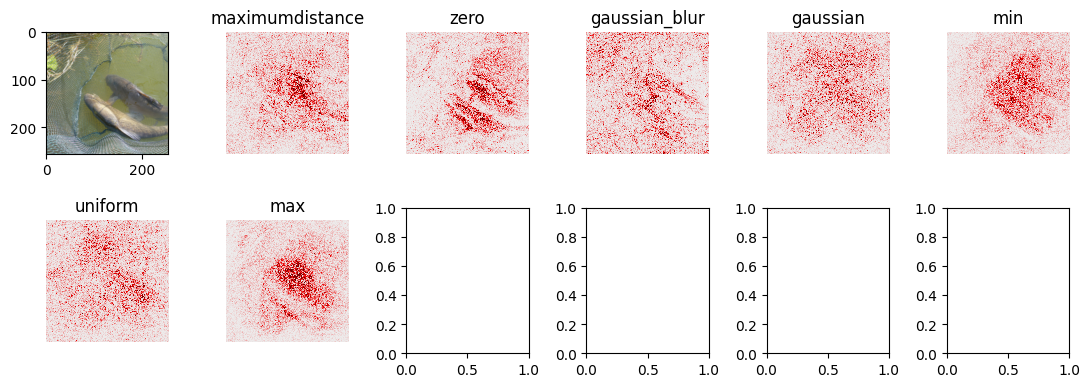

In [3]:

names = {
    'zero',
    'min',
    'max',
    'scalar',
    'encoder',
    'optimizer',
    'hybrid',
    'gaussian_blur',
    'gaussian',
    'uniform',
    'maximumdistance' 
}

index = 0 
x,y = valid_datasets[index]
import numpy as np
import matplotlib.pyplot as plt 
fig, axes = plt.subplots(2, (len(names)//2)+1, figsize=(2*len(names)//2, 2*2))
axes_flat = axes.flat 
my_cmap=plt.cm.seismic(np.arange(plt.cm.seismic.N))

ax = next(axes_flat)
ax.imshow(valid_datasets2[index][0])

for name in names:
    try:
        b_generator =  get_baseline_generator(name)
        baseline = b_generator(x=x,y=y)

    except Exception as e: 
        print("-----")
        print("fail:", name)
        print(e)
        continue
        
    attr = ig(model, x, y, baseline, device=device)
    attr, kwargs  = process_heatmap(attr.cpu(), my_cmap)
    ax = next(axes_flat)
    ax.imshow(attr.numpy(), **kwargs)
    ax.set_title(name)
    ax.axis("off")
plt.tight_layout()